# Ordination on cookie data

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
# Import data
df = pd.read_csv('cookie_table.csv')
df.head()

,Name of the cookie,Nickname of the evaluator (anonymous),vegan (yes/no),no of Ingredients,"Sweetness Factor (1, too sweet, 5 just perfect,10 not sweet enough)","Crunch Factor (1 too little crunch - 10 too much crunch, 5just perfect)","Crumble Factor (1, not crumble 10 tooooo much crumble)","Stickiness (0 no, 1 yes)","Appereance (1, is this a cookie? - 10 this cookie is art)","Contains chocolate (0 no, 1 yes)",...,color,"moisture (1=dry, 10=moist)",salty,nutty,"spiced (w/ Cinnamon, cloves, ginger etc, yes or no)",Overall Score (1 to 10),coconut,Aroma,"Allergensm (flour, eggs, nuts etc., yes or no)",burnt
0,Jacobsen (black),Keks,NaN,NaN,3,6,5.0,0,9,1.0,...,Brown and green,4.0,NaN,yes,No,7.0,NaN,NaN,NaN,NaN
1,X-MAS,Dr Cookie,yes,8.0,7,6,NaN,0,8,1.0,...,brown,4.0,no,no,no,NaN,no,no,yes,0
2,Jacobsen (black),CookieMonster,NaN,NaN,4,5,8.0,0,9,1.0,...,black & white,3.0,no,yes,no,9.0,no,no,no,0
3,I've tried my best,cookie regressor,yes,NaN,5,2,NaN,0,8,0.0,...,NaN,8.0,no,no,no,9.0,yes,no,no,0
4,Chatgpt chocolate cookie,cookie_master,yes,7.0,7,2,4.0,0,7,1.0,...,brown,8.0,no,no,no,7.0,no,normal,no,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 22 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Name of the cookie                                                       66 non-null     object 
 1   Nickname of the evaluator (anonymous)                                    64 non-null     object 
 2   vegan (yes/no)                                                           56 non-null     object 
 3   no of Ingredients                                                        29 non-null     float64
 4   Sweetness Factor (1, too sweet, 5 just perfect,10 not sweet enough)      66 non-null     int64  
 5   Crunch Factor (1 too little crunch - 10 too much crunch, 5just perfect)  66 non-null     int64  
 6   Crumble Factor (1, not crumble 10 tooooo much crumble)                   60 

In [13]:
cols = [col for col in df.columns if df[col].isna().sum() > 10]
df.drop(columns=cols, inplace=True)

df.shape

(66, 18)

In [14]:
df.dropna(inplace=True)
df.shape

(42, 18)

In [15]:
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].unique())

['Chatgpt chocolate cookie' 'snickerdoodle cookies' 'X-MAS'
 'Jacobsen (white)' 'Vegan Coconut' "I've tried my best" 'X-Mas' 'X-mas'
 'Jacobsen (black)' 'Jacbsen (Black)' 'Lebkuchen Herzen']
['cookie_master' 'UC' 'Algebra' 'SweetTooth' 'cookie_dragon' 'COOKIES'
 'KrümelMonster' 'Crumb Connoisseur' 'CookieMonster' 'Dr Cookie'
 'cookie regressor' 'survive' 'ginger cookie man' 'FBT' 'pookiecrumb']
['yes' 'no']
['0' '1' 'no']
['circle' 'Circle' 'hart']
['brown' 'cream' 'Brown' 'light brown' 'dark brown' 'white' 'black'
 'whtile']
['no' 'yes' '0']
['no' 'yes' '0']
['no' 'yes' '0']
['no' 'yes' '0']


In [16]:
# Convert 'no' to 0 and 'yes' to 1 for object columns, handling additional values
for col in df.select_dtypes(include=['object']).columns:
    if {'no', 'yes'}.intersection(set(df[col].unique())):  # Check if column contains 'no' or 'yes'
        df[col] = df[col].replace({'no': 0, 'yes': 1}).astype(int, errors='ignore')

# Check the result
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 4 to 65
Data columns (total 18 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Name of the cookie                                                       42 non-null     object 
 1   Nickname of the evaluator (anonymous)                                    42 non-null     object 
 2   vegan (yes/no)                                                           42 non-null     int64  
 3   Sweetness Factor (1, too sweet, 5 just perfect,10 not sweet enough)      42 non-null     int64  
 4   Crunch Factor (1 too little crunch - 10 too much crunch, 5just perfect)  42 non-null     int64  
 5   Crumble Factor (1, not crumble 10 tooooo much crumble)                   42 non-null     float64
 6   Stickiness (0 no, 1 yes)                                                 42 non-n

/var/folders/v8/1_2rlmrd0wl5w5t5n60h8s440000gn/T/ipykernel_1763/591081958.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'no': 0, 'yes': 1}).astype(int, errors='ignore')


In [17]:
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].unique())

['Chatgpt chocolate cookie' 'snickerdoodle cookies' 'X-MAS'
 'Jacobsen (white)' 'Vegan Coconut' "I've tried my best" 'X-Mas' 'X-mas'
 'Jacobsen (black)' 'Jacbsen (Black)' 'Lebkuchen Herzen']
['cookie_master' 'UC' 'Algebra' 'SweetTooth' 'cookie_dragon' 'COOKIES'
 'KrümelMonster' 'Crumb Connoisseur' 'CookieMonster' 'Dr Cookie'
 'cookie regressor' 'survive' 'ginger cookie man' 'FBT' 'pookiecrumb']
['circle' 'Circle' 'hart']
['brown' 'cream' 'Brown' 'light brown' 'dark brown' 'white' 'black'
 'whtile']


In [56]:
# Select only numerical columns
df_num = df.select_dtypes(include=['float', 'int'])

# Exclude columns with 2 or fewer unique values
df_num = df_num.loc[:, df_num.nunique() > 2]

# Display the resulting DataFrame
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 4 to 65
Data columns (total 7 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Sweetness Factor (1, too sweet, 5 just perfect,10 not sweet enough)      42 non-null     int64  
 1   Crunch Factor (1 too little crunch - 10 too much crunch, 5just perfect)  42 non-null     int64  
 2   Crumble Factor (1, not crumble 10 tooooo much crumble)                   42 non-null     float64
 3   Appereance (1, is this a cookie? - 10 this cookie is art)                42 non-null     int64  
 4   Creativity(1, plain - I have never eaten such a cookie 10)               42 non-null     float64
 5   moisture (1=dry, 10=moist)                                               42 non-null     float64
 6   Overall Score (1 to 10)                                                  42 non-nu

In [58]:
# Remove everything in parentheses from column names
df_num.columns = df_num.columns.str.replace(r"\s*\([^)]*\)", "", regex=True)

# Display the cleaned column names
print(df_num.columns)

Index(['Sweetness Factor', 'Crunch Factor', 'Crumble Factor', 'Appereance',
       'Creativity', 'moisture', 'Overall Score'],
      dtype='object')


In [59]:
scaler = StandardScaler()
x = scaler.fit_transform(df_num)

pca = PCA()
pca_results = pca.fit_transform(x)

In [60]:
principalDf = pd.DataFrame(data = pca_results)

print(principalDf.shape)
principalDf.head()

(42, 7)


,0,1,2,3,4,5,6
0,1.345393,-1.331114,0.592757,0.428860,-0.043308,0.408180,-0.153021
1,1.147730,1.488478,2.505107,-0.060113,0.476266,1.084071,-0.052636
2,0.549524,0.331119,0.539240,-1.468156,-1.431391,-0.634342,-0.415519
3,0.783485,0.963668,-0.869213,0.751207,-0.044365,-0.699226,0.797535
4,0.516712,0.299297,0.397857,-1.503972,0.368357,1.311980,-0.669961


<Axes: >

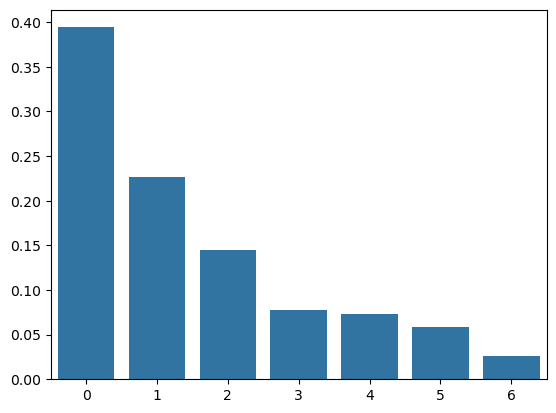

In [61]:
explained_variance = pca.explained_variance_ratio_

sns.barplot(explained_variance)

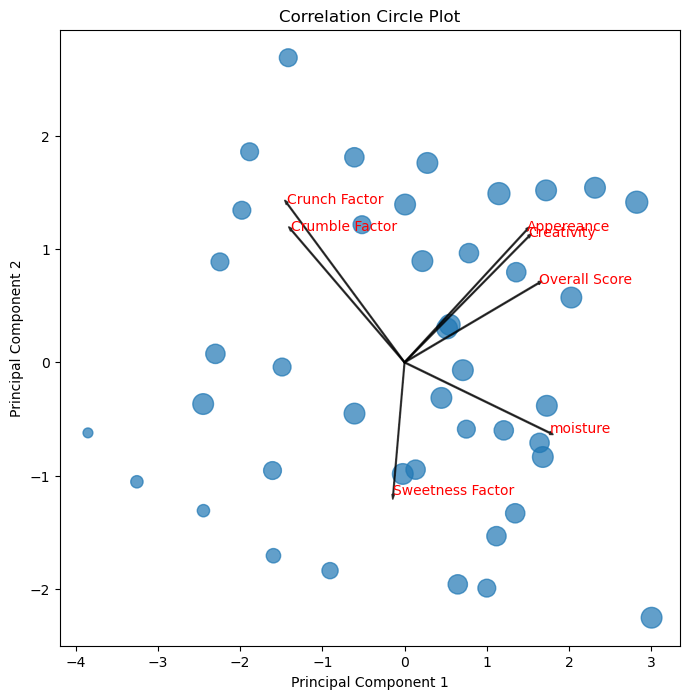

In [71]:
# Get the explained variance ratios for the selected components
explained_variances = pca.explained_variance_ratio_

# Get the principal component vectors (also known as loadings)
loadings = pca.components_.T * np.sqrt(explained_variances) * 6

# Assume 'Overall Score' is a column in your dataframe
overall_scores = df_num["Overall Score"]
# Normalize the scores to set an appropriate range for point sizes
point_sizes = (overall_scores - overall_scores.min()) / (overall_scores.max() - overall_scores.min()) * 200 + 50


# Set figsize and other layout parameters
plt.figure(figsize=(8, 8))
plt.title('Correlation Circle Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.scatter(pca_results[:, 0], # position on the first principal component of the observations
            pca_results[:, 1], 
            s = point_sizes,
            alpha=0.7) # position on the second principal component of the observations

# Add variable labels to the plot
for i, feature in enumerate(df_num.columns):

    # Add the name of the variable near the arrow
    plt.annotate(feature, # variable name
                 (loadings[i, 0],
                  loadings[i, 1]),
                 color='red',
                 fontsize=10)
    
    # Add an arrow representing the variable on the new axis
    plt.arrow(0, 0,
              loadings[i, 0],
              loadings[i, 1],
              color='black',
              alpha=0.7, 
              width=0.01,
             )

# Display the chart
plt.show()

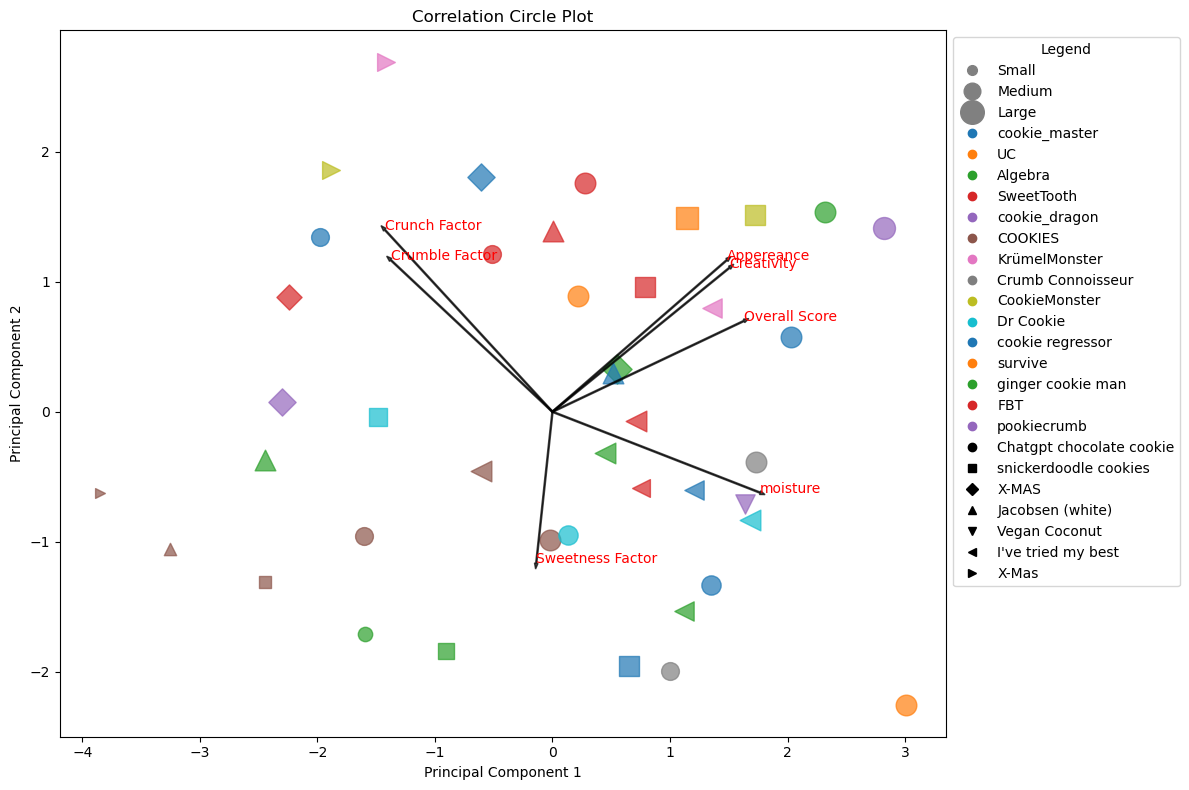

In [81]:
import matplotlib.lines as mlines

# Extract relevant columns
overall_scores = df_num["Overall Score"]
nicknames = df["Nickname of the evaluator (anonymous)"]
cookie_names = df["Name of the cookie"]

# Normalize the scores to set an appropriate range for point sizes
point_sizes = (overall_scores - overall_scores.min()) / (overall_scores.max() - overall_scores.min()) * 200 + 50

# Assign unique colors for each nickname
nickname_colors = {name: color for name, color in zip(nicknames.unique(), sns.color_palette("tab10", len(nicknames.unique())))}

# Assign unique markers for each cookie name
cookie_markers = {name: marker for name, marker in zip(cookie_names.unique(), ['o', 's', 'D', '^', 'v', '<', '>'][:len(cookie_names.unique())])}

# Set up the plot
plt.figure(figsize=(12, 8))
plt.title('Correlation Circle Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot the scatter with variable point sizes, colors, and markers
for i in range(len(df)):
    # Ensure that all cookie names have a corresponding marker
    marker = cookie_markers.get(cookie_names.iloc[i], 'o')  # Default to 'o' if not found
    plt.scatter(pca_results[i, 0],  # position on the first principal component
                pca_results[i, 1],  # position on the second principal component
                s=point_sizes.iloc[i],  # size of the points based on Overall Score
                c=[nickname_colors[nicknames.iloc[i]]],  # color based on nickname
                marker=marker,  # marker based on cookie name
                alpha=0.7)

# Add variable labels to the plot
for i, feature in enumerate(df_num.columns):
    plt.annotate(feature,  # variable name
                 (loadings[i, 0], loadings[i, 1]),
                 color='red',
                 fontsize=10)
    plt.arrow(0, 0,
              loadings[i, 0],
              loadings[i, 1],
              color='black',
              alpha=0.7, 
              width=0.01)

# Create a legend for sizes
size_legend_handles = [
    mlines.Line2D([], [], color='gray', marker='o', linestyle='None', markersize=7, label='Small'),
    mlines.Line2D([], [], color='gray', marker='o', linestyle='None', markersize=12, label='Medium'),
    mlines.Line2D([], [], color='gray', marker='o', linestyle='None', markersize=17, label='Large'),
]

# Create a legend for colors
color_legend_handles = [mlines.Line2D([], [], color=color, marker='o', linestyle='None', label=name) for name, color in nickname_colors.items()]

# Create a legend for markers
marker_legend_handles = [mlines.Line2D([], [], color='black', marker=marker, linestyle='None', label=name) for name, marker in cookie_markers.items()]

# Add legends
plt.legend(handles=size_legend_handles + color_legend_handles + marker_legend_handles, 
           title="Legend", loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()
